### Clustering Algorithms

#### 1. Loading and Preprocessing 

#### Import necessary libraries

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

##### Load Iris dataset

In [40]:
iris = load_iris(as_frame=True)
df = iris.frame

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


##### Drop the species column since this is a clustering problem.

In [49]:
X = df.drop(['target', 'species'], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 2. Clustering Algorithm Implementation

#### 2.1 KMeans Clustering

KMeans is an **unsupervised machine learning algorithm** used to group data into **K clusters** based on their similarity.

**How it works:**
1. Choose the number of clusters `K`.
2. Randomly place `K` points as initial **centroids**.
3. Each data point is assigned to the **nearest centroid**.
4. Recalculate the centroids (center of each cluster).
5. Repeat steps 3 and 4 until centroids stop changing (convergence).

It tries to **minimize the distance** between each point and the center of its assigned cluster.


##### Why is KMeans Clustering Suitable for the Iris Dataset?

- The Iris dataset has **continuous numerical features** (sepal and petal lengths/widths), which are perfect for measuring distances — a key idea in KMeans.
- The data is **well-separated into natural groups** (3 flower species), which makes it a good fit for clustering into 3 clusters.
- It's a small dataset with only 4 features, so KMeans can run very quickly and clearly show results.


##### Applying KMeans Clustering

In [63]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the original dataframe for visualization
df['kmeans_cluster'] = kmeans.labels_
df.head()

C:\Users\reshm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,kmeans_cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


We apply KMeans to our preprocessed dataset (`X`) and set `n_clusters=3` because the Iris dataset has 3 species (Setosa, Versicolor, Virginica).  
The algorithm assigns a **cluster label (0, 1, or 2)** to each row, which we add as a new column to the DataFrame.

##### Visualizing KMeans Clusters

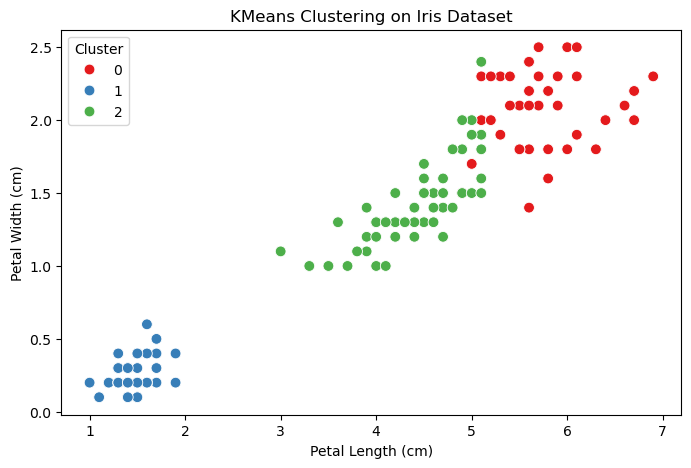

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['petal length (cm)'], y=X['petal width (cm)'],
                hue=df['kmeans_cluster'], palette='Set1', s=60)
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Cluster")
plt.show()


To make it easier to understand, we use only 2 features: **petal length** and **petal width**.  
We plot the data points and color them based on their cluster labels from KMeans.  
This shows how KMeans grouped similar flowers into clusters.

#### 2.2 Hierarchical Clustering

Hierarchical clustering is a type of **unsupervised learning** that builds a tree of clusters.  
There are two types:
- **Agglomerative** (bottom-up) – Most common: each point starts as its own cluster and merges step-by-step.
- **Divisive** (top-down) – Starts with one big cluster and splits it.

**How Agglomerative Clustering Works:**
1. Treat each data point as its own cluster.
2. Find the two closest clusters and merge them.
3. Repeat until all points are merged into a **single cluster tree (dendrogram)**.

This method creates a **hierarchy of clusters**, which can be visualized as a tree (dendrogram).


##### Why is Hierarchical Clustering Suitable for the Iris Dataset?

- The Iris dataset is **small and well-structured**, so it's easy to visualize with a dendrogram.
- It helps to **understand how data points merge into clusters step-by-step**.
- There is no need to pre-define the number of clusters, unlike KMeans.

###### Apply Hierarchical Clustering

In [79]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 3 clusters
hc = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = hc.fit_predict(X)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,kmeans_cluster,hierarchical_cluster
0,5.1,3.5,1.4,0.2,0,setosa,1,1
1,4.9,3.0,1.4,0.2,0,setosa,1,1
2,4.7,3.2,1.3,0.2,0,setosa,1,1
3,4.6,3.1,1.5,0.2,0,setosa,1,1
4,5.0,3.6,1.4,0.2,0,setosa,1,1


We use **AgglomerativeClustering** from `sklearn` and set `n_clusters=3`.  
This assigns each data point to one of 3 clusters, which we store in a new column.

##### Visualizing the clustering process

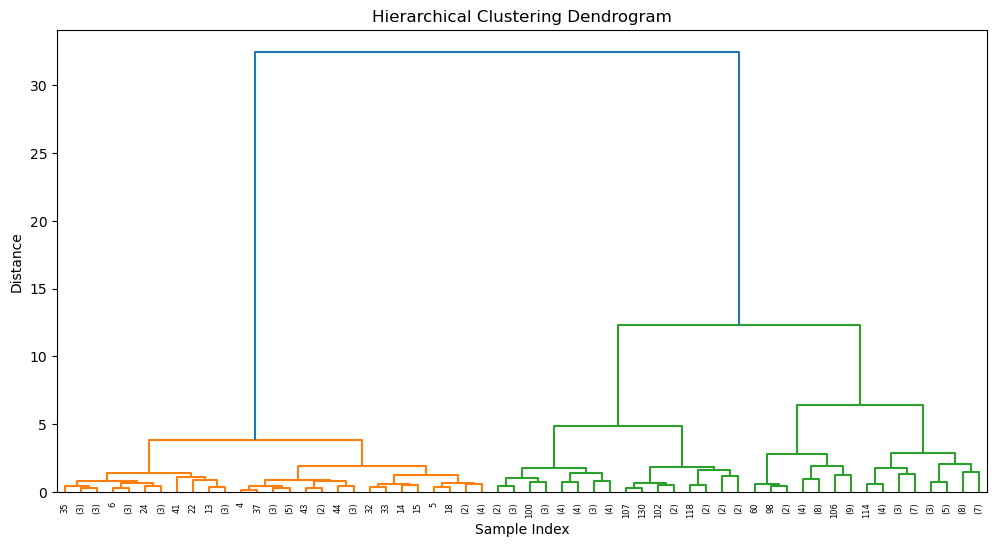

In [88]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Create linkage matrix
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

A **dendrogram** is a tree-like diagram that shows how clusters are formed.  
We use the **Ward method** to minimize the distance between merged clusters.  
The longer the vertical line, the more different the clusters are.

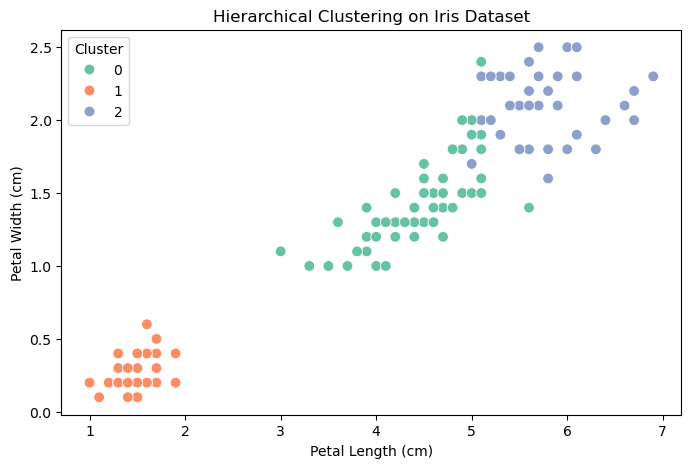

In [93]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['petal length (cm)'], y=X['petal width (cm)'],
                hue=df['hierarchical_cluster'], palette='Set2', s=60)
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Cluster")
plt.show()


We plot the flower data using **petal length** and **petal width** again.  
Each point is colored based on the cluster it was assigned using **Hierarchical Clustering**.

#### 3. Summary

### Dataset Used:
- **Iris dataset** from `sklearn.datasets`
- Contains 150 samples of iris flowers with 4 features: sepal length, sepal width, petal length, petal width.

---

### Step 1: Data Loading & Preprocessing
- Loaded the Iris dataset using `load_iris()`.
- Displayed the first few rows of the data.
- Dropped the `target` and `species` columns for clustering (unsupervised learning doesn't use labels).

---

### Step 2A: KMeans Clustering
- Applied KMeans clustering with `n_clusters=3`.
- Explained how KMeans works and why it's suitable for the Iris dataset.
- Visualized the clusters using a scatter plot with petal features.

---

### Step 2B: Hierarchical Clustering
- Applied Agglomerative (bottom-up) Hierarchical Clustering.
- Explained how it builds a cluster tree.
- Visualized the results using:
  - A **dendrogram** (to show the merge steps)
  - A **scatter plot** (to show the final clusters)
